# Customer Behaviour Analysis

# Objective
In this case study, you will be working on E-commerce Customer Behavior Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale e-commerce datasets using PySpark. You will apply techniques learned in data analytics to clean, transform, and explore customer behavior data, drawing meaningful insights to support business decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing customer segmentation, purchase patterns, and behavioral trends.

# Business Value
E-commerce businesses operate in a highly competitive market where understanding customer behavior is critical to driving growth and retention. To stay ahead, companies must leverage data-driven insights to optimize marketing strategies, personalize customer experiences, and improve product offerings. In this assignment, you will analyze e-commerce transaction data to uncover patterns in purchasing behavior, customer preferences, and sales performance. With Apache Spark's ability to handle large datasets efficiently, businesses can process vast amounts of customer interactions in real-time, helping them make faster and more informed decisions.
As an analyst at an e-commerce company, your task is to examine historical transaction records and customer survey data to derive actionable insights that can drive business growth. Your analysis will help identify high-value customers, segment users based on behavior, and uncover trends in product demand and customer engagement. By leveraging big data analytics, businesses can enhance customer satisfaction, improve retention rates, and maximize revenue opportunities.


# Assignment Tasks
1. Data Preparation
2. Data Cleaning
3. Exploratory Data Analysis
4. Customer Segmentation (RFM Analysis) and Business Insights
5. Evaluation and Conclusion


# Dataset Overview
The dataset can be accessed the following [link](https://drive.google.com/drive/folders/1mBgC5tvZrh1bIBvpXVP_j-au5LFUAwOZ?usp=sharing).

The dataset used in this analysis comprises longitudinal purchase records from 5,027 Amazon.com users in the United States, spanning 2018 to 2022.

It is structured into three CSV files (amazon-purchases.csv, survey.csv, and fields.csv) that capture transactional data, demographic profiles, and survey responses.

Collected with informed consent, the dataset enables analysis of customer behavior, product preferences, and demographic trends.

**NOTE**: Personal identifiers (PII) were removed to ensure privacy, and all data were preprocessed by users before submission.

`Data Dictionary:`

| **Attribute**          | **Description** |
|------------------------|----------------|
| **Order Dates**        | The specific dates when orders were placed, enabling chronological analysis of sales trends. |
| **Title** |The name of the product purchased. |
|**Category** | The classification or group to which the product belongs, facilitating category-wise analysis. |
| **Pricing** | The cost per unit of each product, essential for revenue calculations and pricing strategy assessments. |
| **Quantities** | The number of units of each product ordered in a transaction, aiding in inventory and demand analysis. |
| **Shipping States**    | The states to which products were shipped, useful for geographical sales distribution analysis. |
| **Survey ResponseID**  | A unique identifier linking purchases to customer survey responses, enabling correlation between purchasing behavior and customer feedback. |



# Loading the Datasets

In [1]:
## Installing the libraries if required
# !pip install --quiet pyspark==3.5.4 datasets==3.3.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 numpy==1.26.4 tqdm==4.67.1

sc

VBox()

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-0>

In [ ]:
from pyspark.sql import SparkSession

# Initialise Spark session
spark = SparkSession.builder.appName("Customer Behavior Analysis").getOrCreate()

In [ ]:
spark.sparkContext.install_pypi_package("matplotlib")
spark.sparkContext.install_pypi_package("datasets")
spark.sparkContext.install_pypi_package("pandas")
spark.sparkContext.install_pypi_package("numpy")
spark.sparkContext.install_pypi_package("scikit-learn")
spark.sparkContext.install_pypi_package("kneed")
spark.sparkContext.install_pypi_package("seaborn")
spark.sparkContext.install_pypi_package("KMeans")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pkg_resources

for dist in pkg_resources.working_set:
    print(dist.project_name, dist.version)

In [3]:
from google.colab import files
df = files.upload()
from google.colab import drive
drive.mount('/content/drive')


Saving survey.csv to survey.csv
Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Import the shutil library for file operations
import shutil

# Define source and destination paths
source_path = "/content/survey.csv"  # Path where the file was uploaded
destination_path = "/content/drive/MyDrive/Spark/survey.csv"  # Desired path on Google Drive

# Move the file
shutil.move(source_path, destination_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Spark/survey.csv'

In [5]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
amazon_purchases = spark.read.csv('/content/drive/MyDrive/amazon-purchases.csv', header=True, inferSchema=True)
amazon_purchases.show(5)

+----------+-----------------------+--------+----------------------+--------------------+------------------------+-------------+-----------------+
|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|     Category|Survey ResponseID|
+----------+-----------------------+--------+----------------------+--------------------+------------------------+-------------+-----------------+
|2018-12-04|                   7.98|     1.0|                    NJ|SanDisk Ultra 16G...|              B0143RTB1E| FLASH_MEMORY|R_01vNIayewjIIKMF|
|2018-12-22|                  13.99|     1.0|                    NJ|Betron BS10 Earph...|              B01MA1MJ6H|   HEADPHONES|R_01vNIayewjIIKMF|
|2018-12-24|                   8.99|     1.0|                    NJ|                NULL|              B078JZTFN3|         NULL|R_01vNIayewjIIKMF|
|2018-12-25|                  10.45|     1.0|                    NJ|Perfecto Stainles...|              B06XWF9HML|DISH

In [7]:
survey = spark.read.csv('file:///content/drive/MyDrive/survey.csv', header=True, inferSchema=True)

In [8]:
survey.show(5)

+-----------------+-------------+----------------+--------------------+--------------------+-------------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+----------------+--------------------+---------------+------------+------------------+
|Survey ResponseID|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|   Q-demos-education|     Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substance-use-alcohol|Q-personal-diabetes|Q-personal-wheelchair|Q-life-changes|Q-sell-YOUR-data|Q-sell-consumer-data|Q-small-biz-use|Q-census-use|Q-research-society|
+-----------------+-------------+----------------+--------------------+--------------------+----------------



```
# This is formatted as code
```



In [9]:
fields=spark.read.csv('file:///content/drive/MyDrive/fields.csv', header=True, inferSchema=True)

In [10]:
fields.show()

+--------------------+--------------------+
|                 _c0|              fields|
+--------------------+--------------------+
|   Survey ResponseID|         Response ID|
|         Q-demos-age|What is your age ...|
|    Q-demos-hispanic|Are you of Spanis...|
|        Q-demos-race|Choose one or mor...|
|   Q-demos-education|What is the highe...|
|      Q-demos-income|What was your tot...|
|      Q-demos-gender|How do you descri...|
|Q-sexual-orientation|Which best descri...|
|       Q-demos-state|50 States, D.C. a...|
|Q-amazon-use-howmany|How many people d...|
|Q-amazon-use-hh-size|"How many people ...|
|Q-amazon-use-how-oft|How often do you ...|
|Q-substance-use-c...|Are any of the fo...|
|You or someone in...|                NULL|
|Q-substance-use-m...|Are any of the fo...|
|You or someone in...|                NULL|
|Q-substance-use-a...|Are any of the fo...|
|You or someone in...|                NULL|
| Q-personal-diabetes|Are any of the fo...|
|You or someone in...|          

In [11]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Initialise Spark session
spark = SparkSession.builder \
    .appName("Customer Behavior Analysis") \
    .getOrCreate()

# Load the paths to the datasets/csv files
amazon_purchases_path = "s3://arnavworkspace/Big Data Assignment/amazon-purchases.csv"
survey_path = "s3://arnavworkspace/Big Data Assignment/survey.csv"
fields_path = "s3://arnavworkspace/Big Data Assignment/fields.csv"

# Load datasets into PySpark DataFrames
amazon_purchases = spark.read.csv(amazon_purchases_path,header=True,inferSchema=True)
survey = spark.read.csv(survey_path, header=True, inferSchema=True)
fields = spark.read.csv(fields_path, header=True, inferSchema=True)


# Rename column in both DataFrames
amazon_purchases = amazon_purchases.withColumnRenamed("Survey ResponseID",
                                                      "ResponseID")
survey = survey.withColumnRenamed("Survey ResponseID", "ResponseID")

# Now perform the join
merged_data = amazon_purchases.join(survey, on="ResponseID", how="inner")

# Display the merged data
df = merged_data

In [12]:
df.show(5)

+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+--------------------+--------------------+---------------+------------+------------------+
|       ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|     Category|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|Q-demos-education|   Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substance-use-alcohol|Q-pe

#1. Data Preparation

Before analysis, the data needs to be prepared to ensure consistency and efficiency.
- Check for data consistency and ensure all columns are correctly formatted.
- Structure and prepare the dataset for further processing, ensuring that relevant features are retained


In [13]:
from pyspark.sql.functions import col, sum as spark_sum, when

# Check for missing values in the merged dataset

# Generate a summary of null counts for each column
null_counts = df.select([
    spark_sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
    for c in merged_data.columns
])

# Show the null count for each column
null_counts.show()

+----------+----------+-----------------------+--------+----------------------+-----+------------------------+--------+-----------+----------------+------------+-----------------+--------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+----------------+--------------------+---------------+------------+------------------+
|ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|Title|ASIN/ISBN (Product Code)|Category|Q-demos-age|Q-demos-hispanic|Q-demos-race|Q-demos-education|Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substance-use-alcohol|Q-personal-diabetes|Q-personal-wheelchair|Q-life-changes|Q-sell-YOUR-data|Q-sell-consume

#2. Data Cleaning <font color = red>[20 marks]</font> <br>

Prepare the data for further analysis by performing data cleaning such as missing value treatment, handle data schema, outlier analysis, and relevant feature engineering techniques.

## 2.1 Handling Missing values <font color = red>[10 marks]</font> <br>
Handle missing values in the data

In [14]:
# Import necessary functions
from pyspark.sql.functions import when

# Fill missing (null) values with the appropriate techniques as required by the analysis

# Aggregate and count missing values (nulls) for each column after replacement

# Display the count of remaining missing values in each column

In [15]:
# Your code here

from pyspark.sql.functions import col, isnan, isnull, when, count
from pyspark.sql.types import DoubleType, FloatType

# Step 0: Create 'filled_df' by filling missing values
filled_df = df.fillna({'Order Date': 'Unknown', 'Quantity': 0})

# Step 1: Count specific missing values (before filling)
df.select(
    count(when(isnull("Order Date"), "Order Date")).alias("null_order_date"),
    count(when(isnull("Quantity") | isnan("Quantity"),
               "Quantity")).alias("null_or_nan_quantity")).show()

# Step 2: Count missing values in all columns after filling
missing_counts = filled_df.select([
    count(
        when((col(c).isNull() | isnan(col(c))) if isinstance(
            filled_df.schema[c].dataType,
            (DoubleType, FloatType)) else col(c).isNull(), c)).alias(c)
    for c in filled_df.columns
])

# Step 3: Show result
missing_counts.show()

+---------------+--------------------+
|null_order_date|null_or_nan_quantity|
+---------------+--------------------+
|              0|                   0|
+---------------+--------------------+

+----------+----------+-----------------------+--------+----------------------+-----+------------------------+--------+-----------+----------------+------------+-----------------+--------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+----------------+--------------------+---------------+------------+------------------+
|ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|Title|ASIN/ISBN (Product Code)|Category|Q-demos-age|Q-demos-hispanic|Q-demos-race|Q-demos-education|Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-us

## 2.2 Feature Engineering <font color = red>[5 marks]</font> <br>
Perform feature engineering on the dataset to extract relevant/ create new features as required and map specific data types.

In [16]:
from pyspark.sql.functions import col, month, year, to_date

# Perform appropriate feature engineering. Eg. Extract order date, month, year and cast to the appropriate values

# Display the updated dataset

In [17]:
from pyspark.sql.functions import create_map, lit
from itertools import chain

from pyspark.sql.functions import col, month, year, to_date, create_map, lit, when

# Convert Order Date to proper date type and extract features
filled_df = filled_df.withColumn("Order Date", to_date(col("Order Date"))) \
    .withColumn("Order_Month", month(col("Order Date"))) \
    .withColumn("Order_Year", year(col("Order Date")))

# Income mapping dictionary
income_mapping = {
    'Less than $25,000': 0,
    '$25,000 - $49,999': 1,
    '$50,000 - $74,999': 2,
    '$75,000 - $99,999': 3,
    '$100,000 - $149,999': 4,
    '$150,000 or more': 5
}

# Gender mapping dictionary
gender_mapping = {
    'Male': 0,
    'Female': 1,
    'Non-binary': 2,
    'Other': 3,
    'Prefer not to say': 4
}

# Create mapping expressions
income_expr = create_map(
    [lit(k) for k, v in income_mapping.items() for _ in (0, 1)])
gender_expr = create_map(
    [lit(k) for k, v in gender_mapping.items() for _ in (0, 1)])

# Apply categorical mappings
filled_df = filled_df.withColumn("Income_Num", income_expr[col("Q-demos-income")]) \
    .withColumn("Gender_Num", gender_expr[col("Q-demos-gender")])

# Handle any null/unmapped values (optional)
filled_df = filled_df.withColumn(
    "Gender_Num",
    when(col("Gender_Num").isNotNull(),
         col("Gender_Num")).otherwise(6))  # 6 for unknown/unmapped categories

# Show updated schema and sample data
print("Updated Schema:")
filled_df.printSchema()

print("\nSample Data:")
filled_df.select("Order Date", "Order_Month", "Order_Year", "Q-demos-income",
                 "Income_Num", "Q-demos-gender", "Gender_Num").show(5)

Updated Schema:
root
 |-- ResponseID: string (nullable = true)
 |-- Order Date: date (nullable = true)
 |-- Purchase Price Per Unit: double (nullable = true)
 |-- Quantity: double (nullable = false)
 |-- Shipping Address State: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- ASIN/ISBN (Product Code): string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Q-demos-age: string (nullable = true)
 |-- Q-demos-hispanic: string (nullable = true)
 |-- Q-demos-race: string (nullable = true)
 |-- Q-demos-education: string (nullable = true)
 |-- Q-demos-income: string (nullable = true)
 |-- Q-demos-gender: string (nullable = true)
 |-- Q-sexual-orientation: string (nullable = true)
 |-- Q-demos-state: string (nullable = true)
 |-- Q-amazon-use-howmany: string (nullable = true)
 |-- Q-amazon-use-hh-size: string (nullable = true)
 |-- Q-amazon-use-how-oft: string (nullable = true)
 |-- Q-substance-use-cigarettes: string (nullable = true)
 |-- Q-substance-use-mariju

## 2.3 Data Cleaning <font color = red>[5 marks]</font> <br>
Handle data cleaning techniques such as data duplication, dropping unnecessary values etc.

In [18]:
# Check for duplicates
print("Number of Duplicates:",
      merged_data.count() - merged_data.dropDuplicates().count())

# Remove duplicates
merged_data = merged_data.dropDuplicates()

# Verify duplicates after cleaning
print("Number of Duplicates After Cleaning:",
      merged_data.count() - merged_data.dropDuplicates().count())

Number of Duplicates: 11516
Number of Duplicates After Cleaning: 0


In [19]:
# Define the path where the cleaned data will be saved
cleaned_data_path = "path/to/cleaned_data"  # e.g., "./output/cleaned_data"

# Save the cleaned dataset locally
merged_data.write.csv(cleaned_data_path, header=True, mode='overwrite')

# Load the cleaned dataset from the location
cleaned_data = spark.read.csv(cleaned_data_path, header=True, inferSchema=True)

# Display the first few rows
print("Cleaned Data:")
cleaned_data.show(5)

Cleaned Data:
+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+---------+-------------+----------------+------------------+--------------------+-------------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------------+--------------------+--------------------+---------------+------------+------------------+
|       ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)| Category|  Q-demos-age|Q-demos-hispanic|      Q-demos-race|   Q-demos-education|     Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-substanc

# 3. Exploratory Data Analysis <font color = red>[55 marks]</font> <br>

## 3.1 Analyse purchases by hour, day and month <font color = red>[5 marks]</font> <br>

Examine overall trends in purchases over time and analyse the trends by hour, day, month.

In [20]:
%pip install seaborn

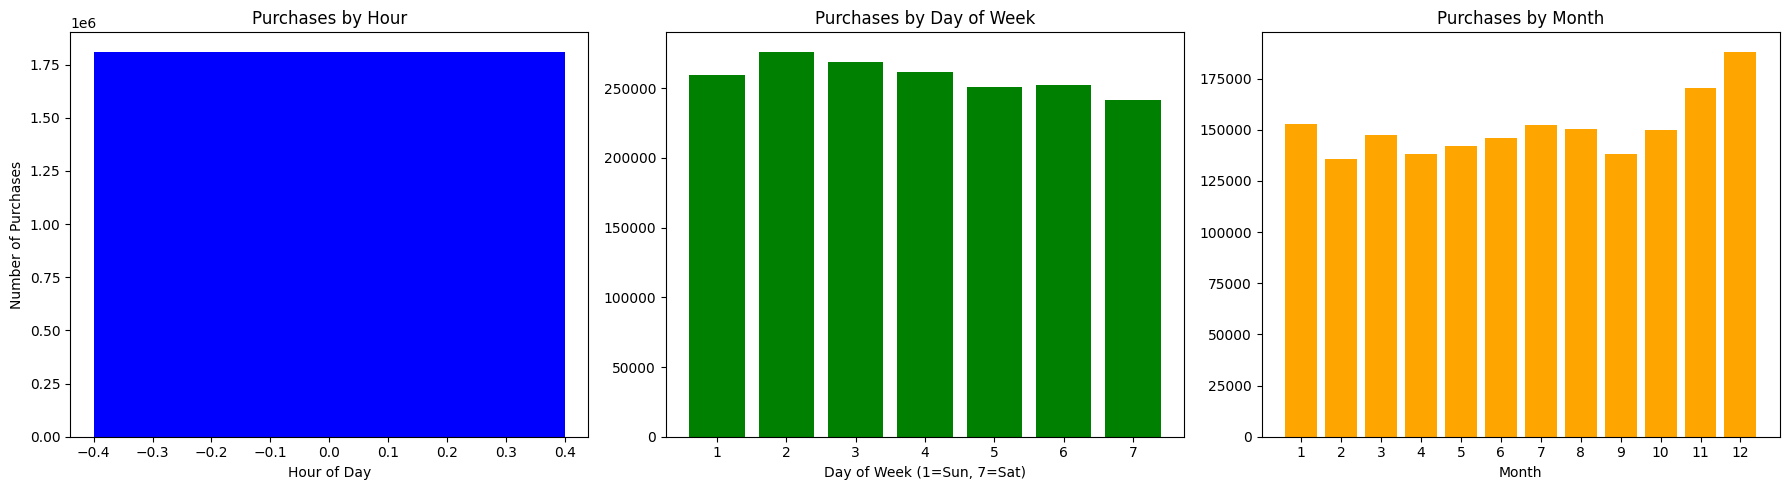

In [20]:
# Purchase Distribution by Hour, Day, and Month

from pyspark.sql.functions import hour, dayofweek, month
import matplotlib.pyplot as plt

# Extract temporal features
time_df = df.withColumn("Hour", hour("Order Date")) \
            .withColumn("DayOfWeek", dayofweek("Order Date")) \
            .withColumn("Month", month("Order Date"))

# Aggregate data
hour_df = time_df.groupBy("Hour").count().orderBy("Hour").toPandas()
day_df = time_df.groupBy("DayOfWeek").count().orderBy("DayOfWeek").toPandas()
month_df = time_df.groupBy("Month").count().orderBy("Month").toPandas()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(hour_df["Hour"], hour_df["count"], color="blue")
axes[0].set_title("Purchases by Hour")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Number of Purchases")

axes[1].bar(day_df["DayOfWeek"], day_df["count"], color="green")
axes[1].set_title("Purchases by Day of Week")
axes[1].set_xlabel("Day of Week (1=Sun, 7=Sat)")
axes[1].set_xticks(range(1, 8))

axes[2].bar(month_df["Month"], month_df["count"], color="orange")
axes[2].set_title("Purchases by Month")
axes[2].set_xlabel("Month")
axes[2].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

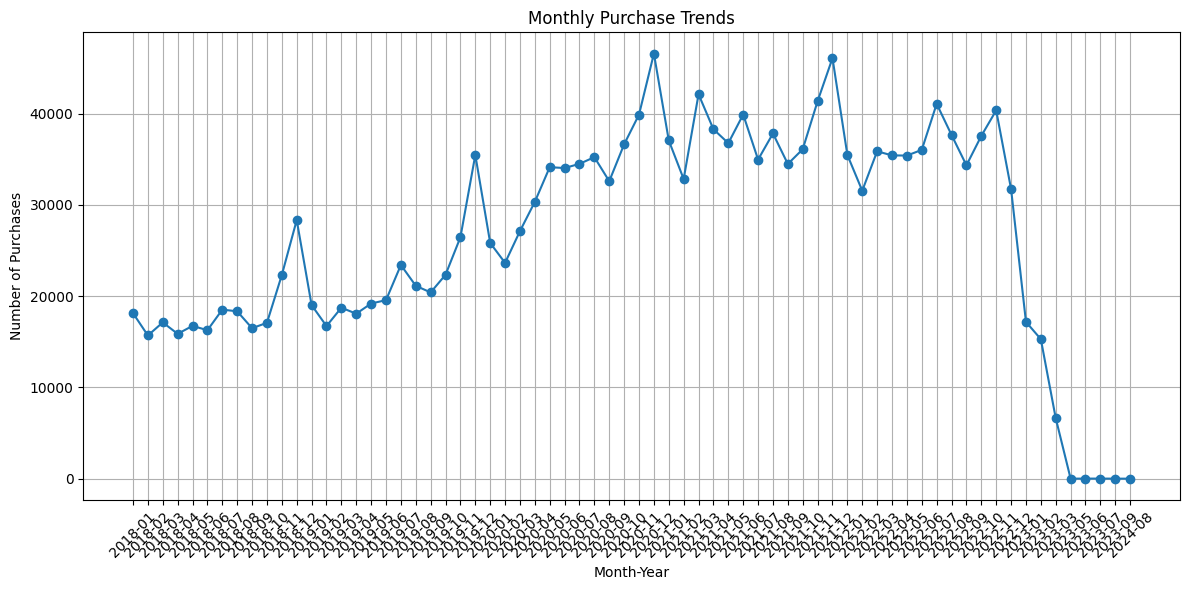

In [23]:
# Monthly Purchase Trends

from pyspark.sql.functions import date_format,to_date

# Extract month and year from 'Order Date'
df = df.withColumn("OrderDate", to_date("Order Date", "MM/dd/yyyy"))
df = df.withColumn("MonthYear", date_format("OrderDate", "yyyy-MM"))
# Group by month and count purchases
monthly_trends = df.groupBy("MonthYear").count().orderBy("MonthYear")
# Convert to Pandas for visualisation
monthly_trends_pd = monthly_trends.toPandas()
# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_trends_pd["MonthYear"], monthly_trends_pd["count"], marker='o')
plt.title("Monthly Purchase Trends")
plt.xlabel("Month-Year")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

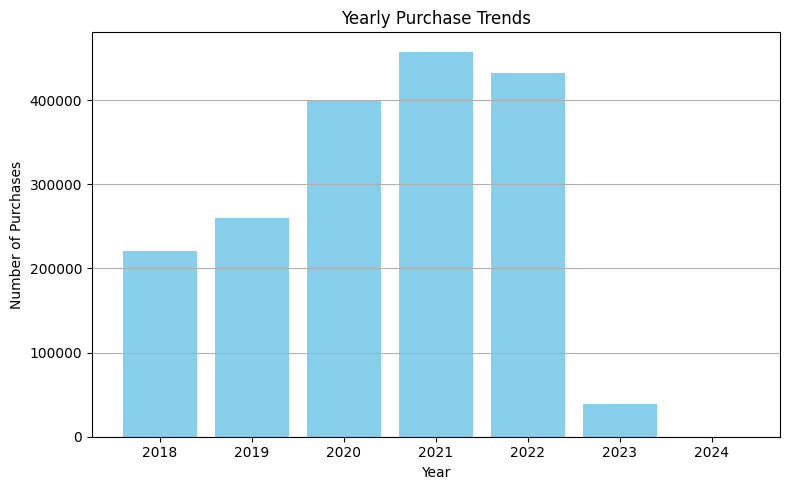

In [24]:
# Yealy Purchase Trends

from pyspark.sql.functions import date_format
df = df.withColumn("Year", year("OrderDate"))

# Group by Year and count purchases
yearly_trends = df.groupBy("Year").count().orderBy("Year")

# Convert to Pandas for visualisation
yearly_trends_pd = yearly_trends.toPandas()

# Plot
plt.figure(figsize=(8,5))
plt.bar(yearly_trends_pd["Year"].astype(str), yearly_trends_pd["count"], color='skyblue')
plt.title("Yearly Purchase Trends")
plt.xlabel("Year")
plt.ylabel("Number of Purchases")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [25]:
df.show(5)

+-----------------+----------+-----------------------+--------+----------------------+--------------------+------------------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------------+-------------------------+-----------------------+-------------------+---------------------+--------------+--------------------+--------------------+---------------+------------+------------------+----------+---------+----+
|       ResponseID|Order Date|Purchase Price Per Unit|Quantity|Shipping Address State|               Title|ASIN/ISBN (Product Code)|     Category|  Q-demos-age|Q-demos-hispanic|        Q-demos-race|Q-demos-education|   Q-demos-income|Q-demos-gender|Q-sexual-orientation|Q-demos-state|Q-amazon-use-howmany|Q-amazon-use-hh-size|Q-amazon-use-how-oft|Q-substance-use-cigarettes|Q-substance-use-marijuana|Q-

## 3.2 Customer Demographics vs Purchase Frequency <font color = red>[5 marks]</font> <br>
Analyse the trends between the customer deographics and the purchase frequency

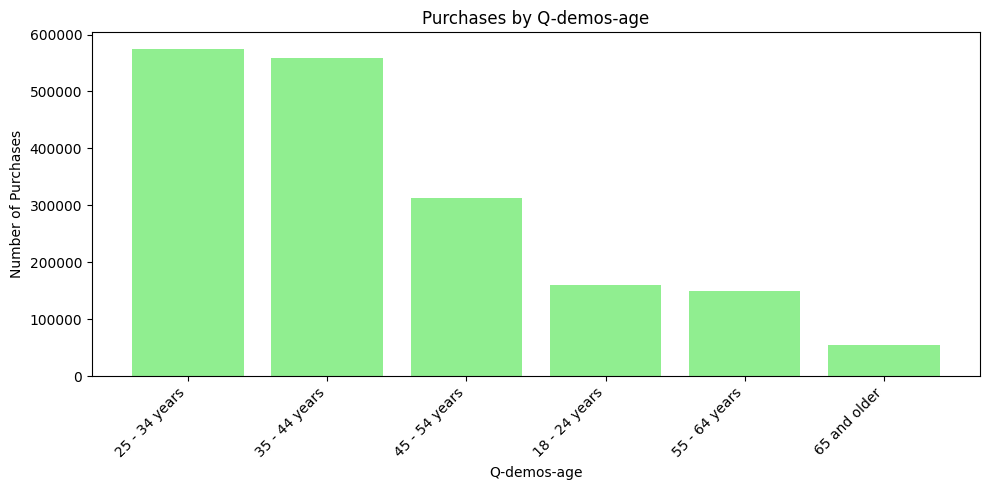

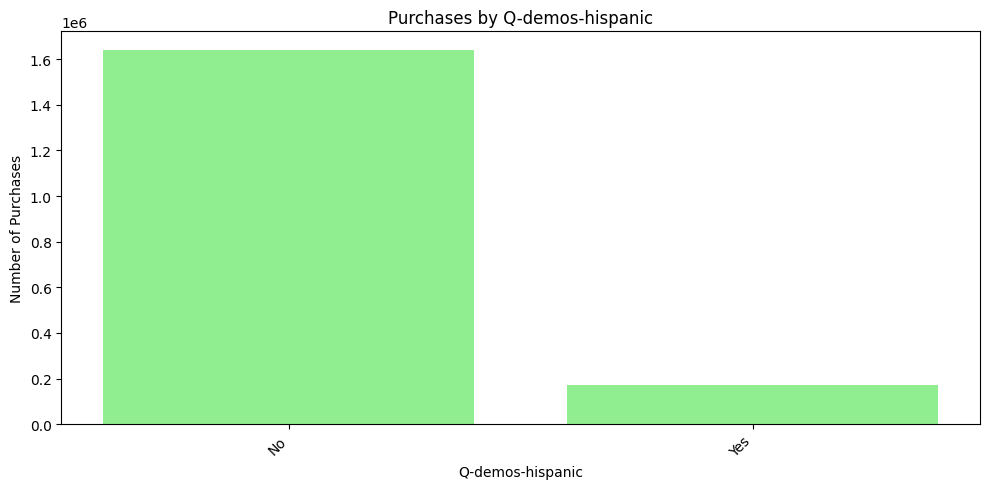

<ipython-input-26-d194f46119d2>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


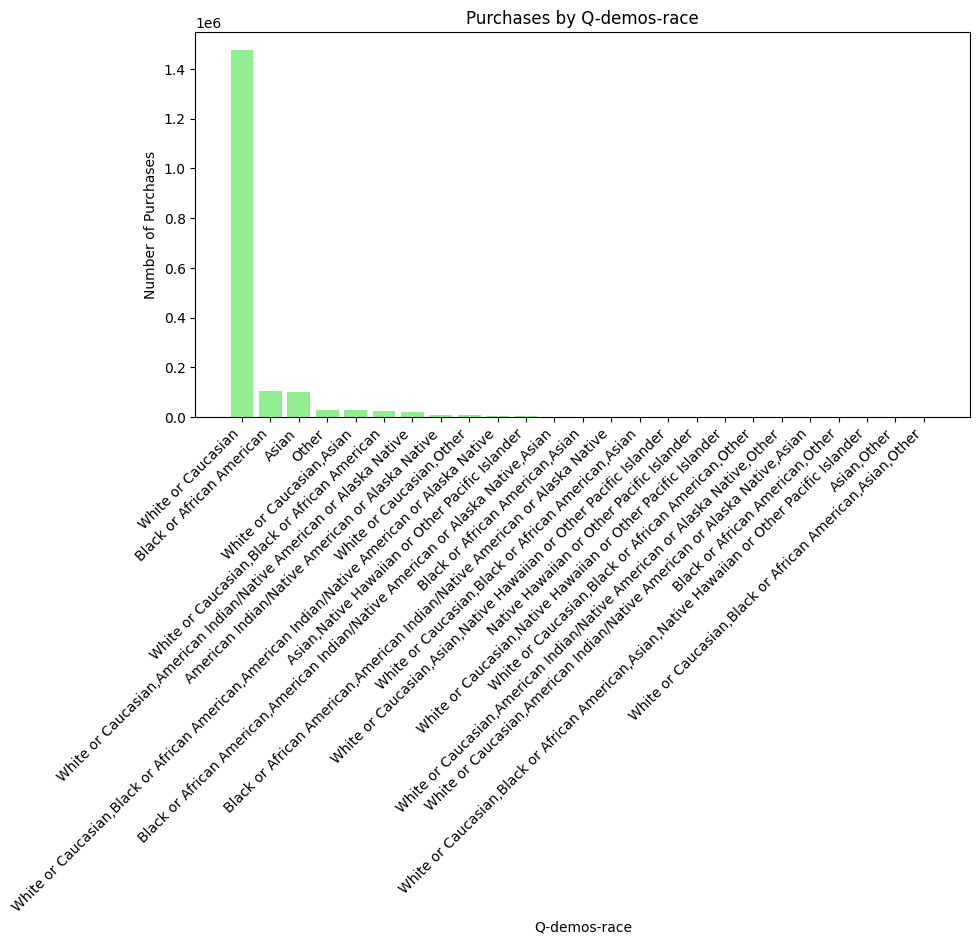

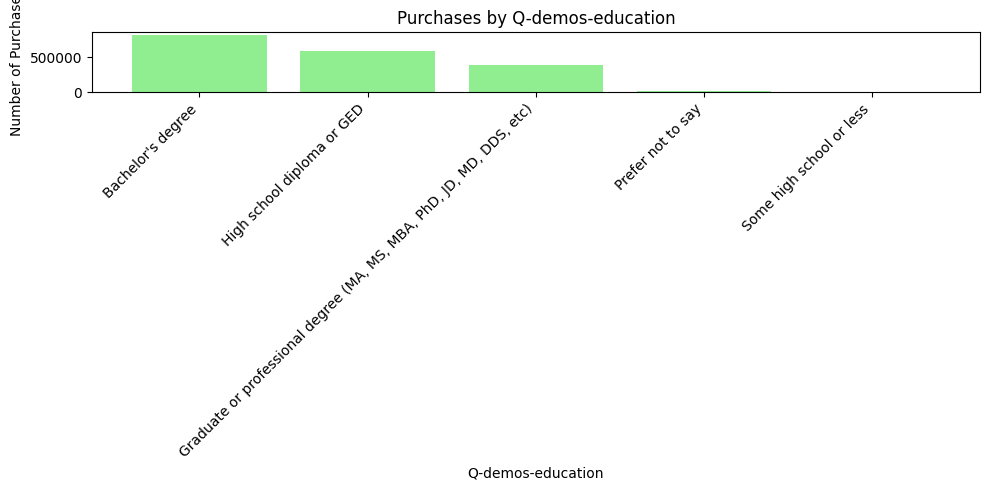

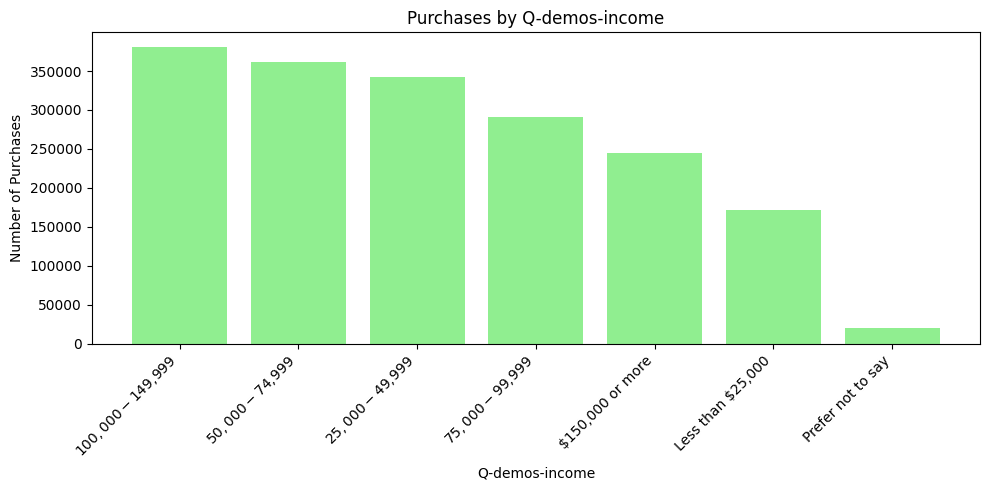

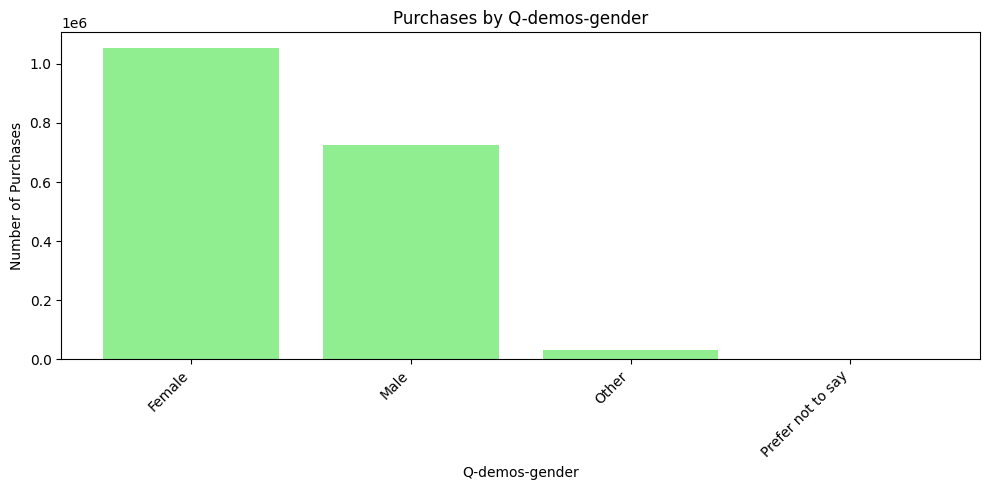

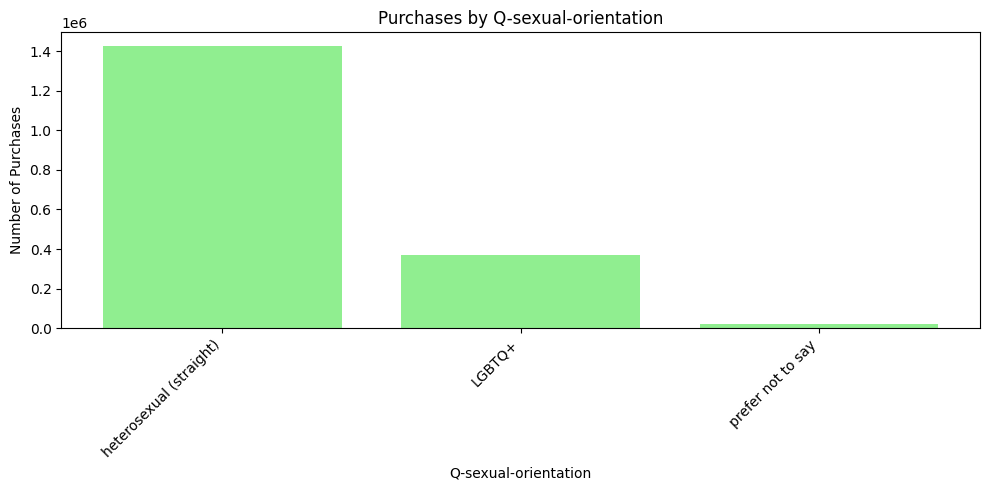

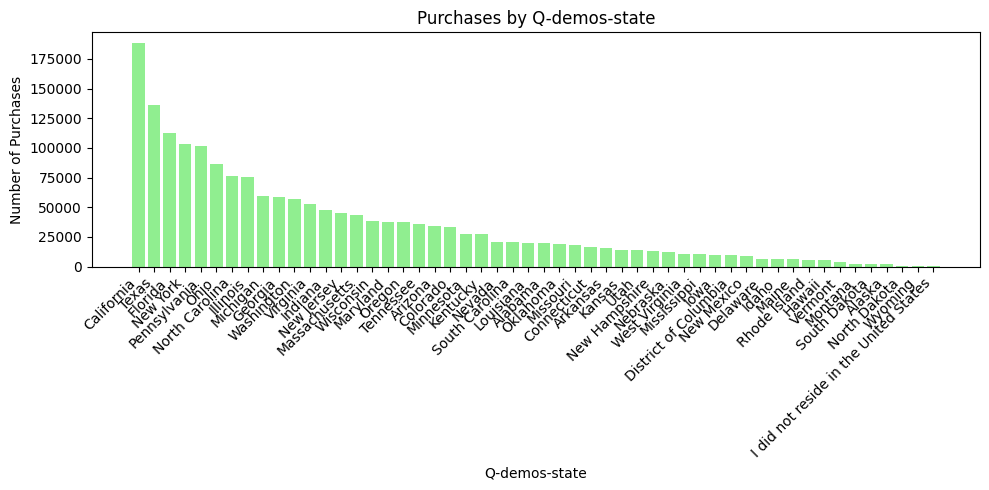

In [26]:
# Correlation Between Demographics and Purchase Frequency

from pyspark.sql.functions import count

demographic_cols = ["Q-demos-age", "Q-demos-hispanic", "Q-demos-race", "Q-demos-education",
    "Q-demos-income", "Q-demos-gender", "Q-sexual-orientation", "Q-demos-state"]
#  Group by demographic attributes and count purchases
for col in demographic_cols:
    demo_grouped = df.groupBy(col).count().orderBy("count", ascending=False)
    # Convert to Pandas for visualisation
    demo_grouped_pd = demo_grouped.toPandas()
    # Plot
    plt.figure(figsize=(10,5))
    plt.bar(demo_grouped_pd[col].astype(str), demo_grouped_pd["count"], color="lightgreen")
    plt.title(f"Purchases by {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Purchases")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 3.3 Purchase behavior weekend vs weekday <font color = red>[5 marks]</font> <br>

Compare the purchase behavior of customer's on weekdays vs. weekends.

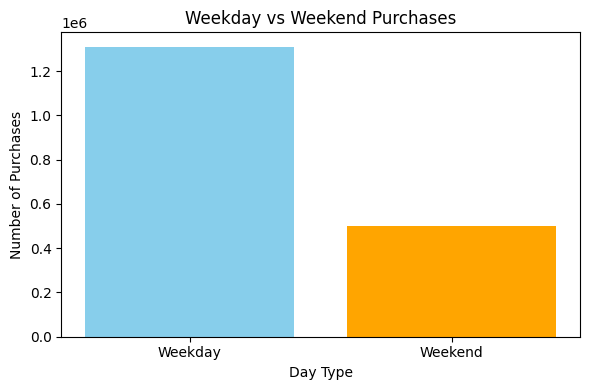

In [27]:
# Weekday vs. Weekend Purchase Behavior

from pyspark.sql.functions import when, dayofweek

# Define weekdays and weekends
wkday_vs_wkend_df = df.withColumn("TypeofDay", when(dayofweek("Order Date").isin([1, 7]), "Weekend").otherwise("Weekday"))

# Group and count purchases
day_type_df = wkday_vs_wkend_df.groupBy("TypeofDay").count()

# Convert to Pandas for visualisation
day_type_df_pd=day_type_df.toPandas()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(day_type_df_pd["TypeofDay"], day_type_df_pd["count"], color=["skyblue", "orange"])
plt.title("Weekday vs Weekend Purchases")
plt.xlabel("Day Type")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()


## 3.4 Frequently purchased product pairs <font color = red>[5 marks]</font> <br>

Analyze how frequently products are purchased together (also known as Market Basket Analysis)


In [ ]:
# Frequently Purchased Product Pairs (Market Basket Analysis)

from pyspark.sql.functions import col, collect_set, explode, size
import itertools
from pyspark.sql import Row

# Group purchases by customer and collect items bought together

basket_df = df.groupBy("ResponseID").agg(collect_set("ASIN/ISBN (Product Code)").alias("products"))

basket_df = basket_df.filter(size("products") > 1)

# Explode item pairs
def generate_pairs(products):
    return list(itertools.combinations(sorted(products), 2))

product_pairs_rdd = basket_df.rdd.flatMap(lambda row: generate_pairs(row['products']))
product_pairs_df = product_pairs_rdd.map(lambda x: Row(product1=x[0], product2=x[1])).toDF()


# Count co-occurrences of items
product_pairwise_counts = product_pairs_df.groupBy("product1", "product2").count().orderBy(col("count").desc())

# Convert to Pandas for visualisation
top_pairwise_product_pd = product_pairwise_counts.limit(10).toPandas()


# Plot

plt.figure(figsize=(12, 6))
pair_labels = [f"{row['product1']} & {row['product2']}" for _, row in top_pairwise_product_pd.iterrows()]
plt.barh(pair_labels, top_pairwise_product_pd["count"], color="mediumseagreen")
plt.xlabel("Number of Co-occurrences")
plt.title("Top 10 Frequently Purchased Product Pairs")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3.5 Examine Product Performance <font color = red>[5 marks]</font> <br>

Examine the performance of products by calculating revenue and item popularity.

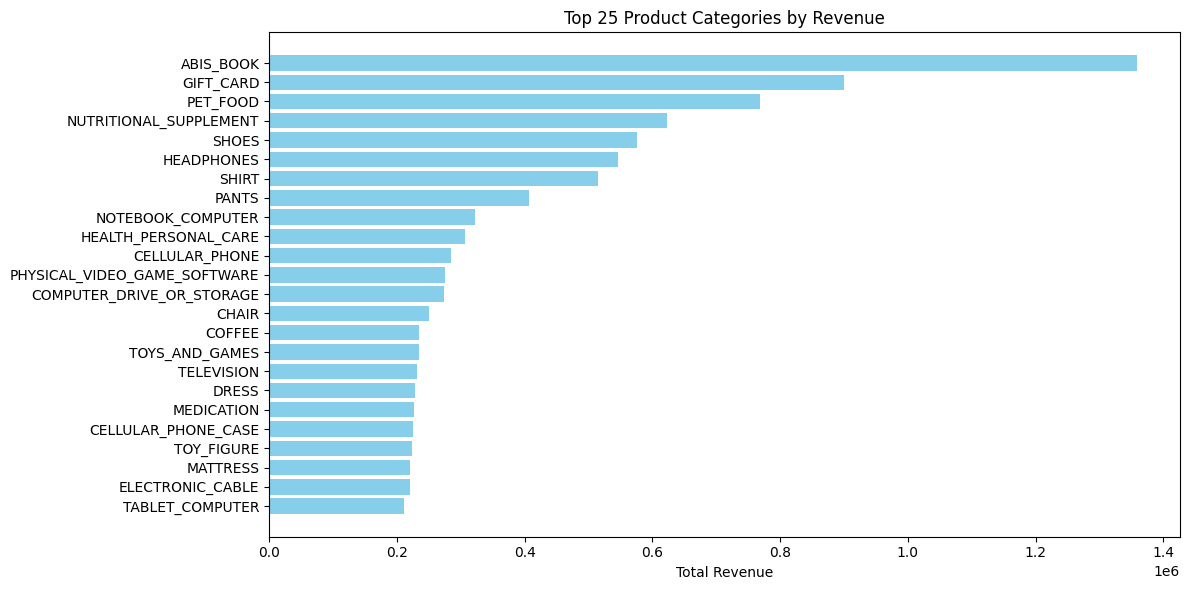

In [31]:
from pyspark.sql.functions import col, expr
from pyspark.sql.functions import sum as _sum, count

# Contribution of Product Categories (Top 25)
df = df.withColumn("Revenue", col("Purchase Price Per Unit") * col("Quantity"))


# Group by category and calculate total revenue and popularity
category_perf_df = df.groupBy("Category").agg(
    _sum("Revenue").alias("TotalRevenue"),
    count("*").alias("NumPurchases")
)

# Get Top 25 Categories by Revenue
top_25_categories = category_perf_df.orderBy(col("TotalRevenue").desc()).limit(25)
# Convert to Pandas for visualisation
top_25_pd = top_25_categories.toPandas()
# Plot

import matplotlib.pyplot as plt
# Drop rows with null in 'Category' or 'TotalRevenue'
top_25_pd_cleaned = top_25_pd.dropna(subset=["Category", "TotalRevenue"])

plt.figure(figsize=(12, 6))
plt.barh(top_25_pd_cleaned["Category"], top_25_pd_cleaned["TotalRevenue"], color="skyblue")
plt.xlabel("Total Revenue")
plt.title("Top 25 Product Categories by Revenue")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



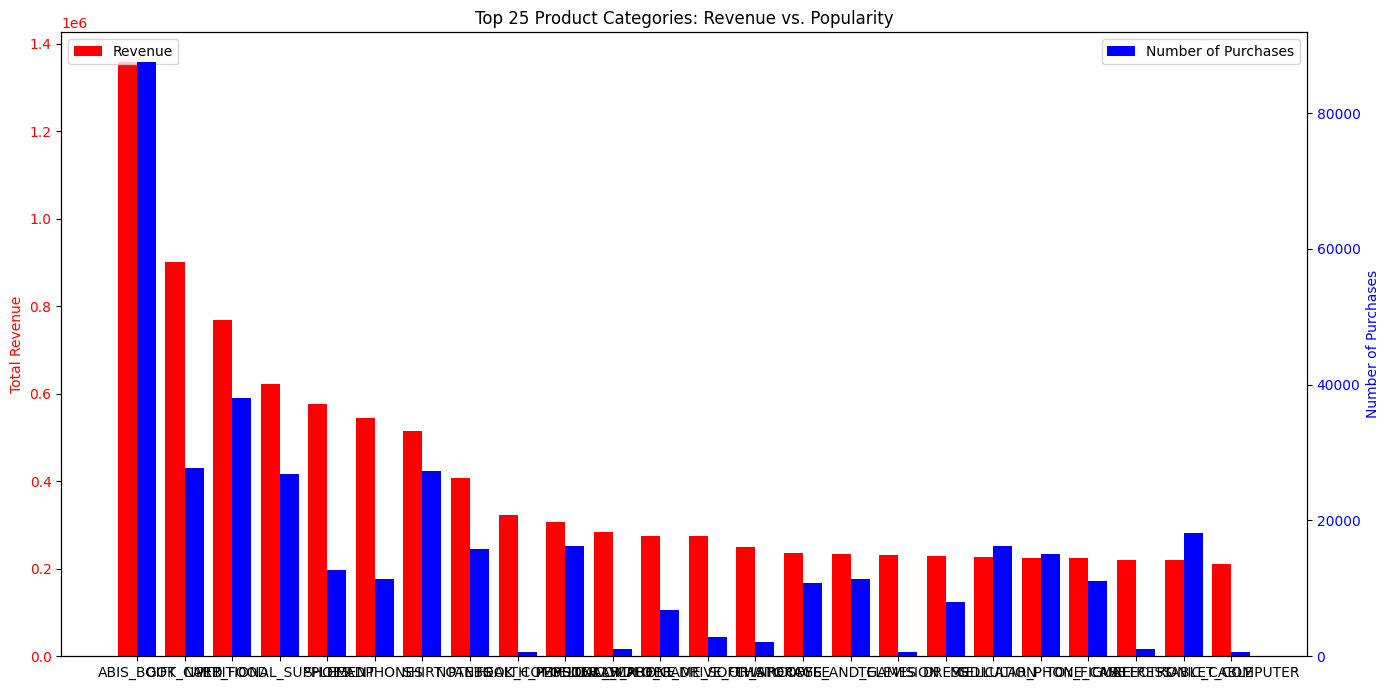

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Sort values for consistent plotting
top_25_pd_cleaned = top_25_pd_cleaned.sort_values("TotalRevenue", ascending=False)

# Prepare data
categories = top_25_pd_cleaned["Category"]
revenue = top_25_pd_cleaned["TotalRevenue"]
popularity = top_25_pd_cleaned["NumPurchases"]

x = np.arange(len(categories))  # label locations
width = 0.4  # width of bars

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot revenue bars
bar1 = ax1.bar(x - width/2, revenue, width, label="Revenue", color='red')
ax1.set_ylabel('Total Revenue', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create second y-axis
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, popularity, width, label="Number of Purchases", color='blue')
ax2.set_ylabel('Number of Purchases', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# X-axis setup
plt.xticks(x, categories, rotation=45, ha='right')
plt.title("Top 25 Product Categories: Revenue vs. Popularity")
fig.tight_layout()

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

## 3.6 Top products by quantity <font color = red>[5 marks]</font> <br>

Identify the most frequently purchased products.

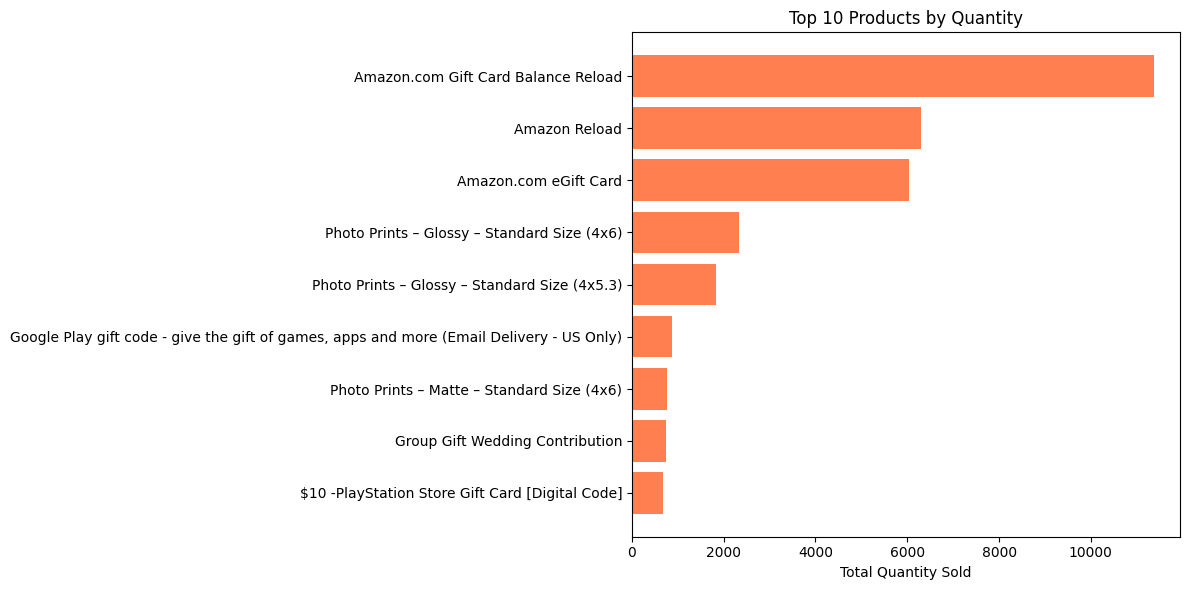

In [36]:
# Top 10 Products by Quantity
from pyspark.sql.functions import sum as _sum

# Group by product title and sum 'Quantity'
top_products_quantity = df.groupBy("Title").agg(_sum("Quantity").alias("TotalQuantity"))
top_10_products_quantity = top_products_quantity.orderBy("TotalQuantity", ascending=False).limit(10)
# Convert to Pandas for visualisation
top_10_products_pd = top_10_products_quantity.toPandas()
# Plot
import matplotlib.pyplot as plt

# Drop nulls if any titles are missing
top_10_products_pd = top_10_products_pd.dropna(subset=["Title"])

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_products_pd["Title"], top_10_products_pd["TotalQuantity"], color="coral")
plt.xlabel("Total Quantity Sold")
plt.title("Top 10 Products by Quantity")
plt.gca().invert_yaxis()  # Highest quantity at the top
plt.tight_layout()
plt.show()

## 3.7 Distribution of Purchases by State <font color = red>[5 marks]</font> <br>

Analyze the distribution of purchases across states and categories.

In [41]:
# Distribution of Purchases by State (Top 25)
state_category_df = df.groupBy("Q-demos-state", "Category").count()

# Convert to Pandas for visualisation
state_category_pd = state_category_df.toPandas()

# Drop nulls
state_category_pd = state_category_pd.dropna(subset=["Q-demos-state", "Category"])

top_25_states = (
    state_category_pd.groupby("Q-demos-state")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(25)
    .index
)
filtered_df = state_category_pd[state_category_pd["Q-demos-state"].isin(top_25_states)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.barplot(
    data=filtered_df,
    x="Q-demos-state",
    y="count",
    hue="Category"
)
plt.title("Purchases by Category Across Top 25 States")
plt.xlabel("State")
plt.ylabel("Number of Purchases")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-41-28b208ac4aa3>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


## 3.8 Price vs Product Quantity <font color = red>[5 marks]</font> <br>

Identify the Relationship between Price and Quantity

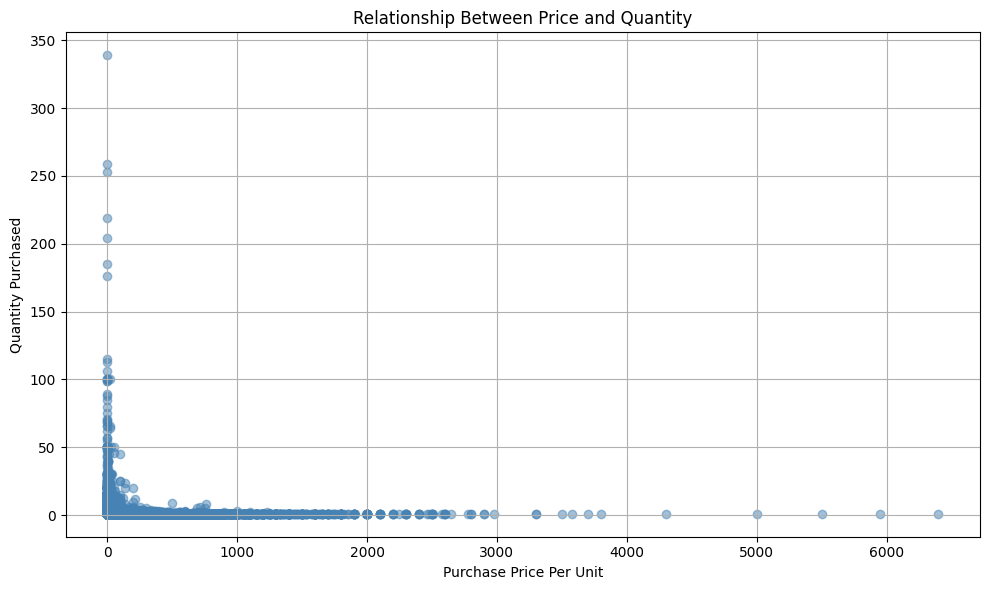

In [43]:
# Relationship Between Price and Quantity

import pandas as pd
price_qty_df = df.select("Purchase Price Per Unit", "Quantity")

# Convert to Pandas for visualisation
price_qty_pd = price_qty_df.toPandas()
price_qty_pd=price_qty_pd.dropna()

price_qty_pd["Purchase Price Per Unit"] = pd.to_numeric(price_qty_pd["Purchase Price Per Unit"], errors="coerce")
price_qty_pd["Quantity"] = pd.to_numeric(price_qty_pd["Quantity"], errors="coerce")

# Drop any rows that couldn't be converted
price_qty_pd.dropna(inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(price_qty_pd["Purchase Price Per Unit"], price_qty_pd["Quantity"], alpha=0.5, color="steelblue")
plt.title("Relationship Between Price and Quantity")
plt.xlabel("Purchase Price Per Unit")
plt.ylabel("Quantity Purchased")
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.9 Analyse the spending KPIs <font color = red>[5 marks]</font> <br>


A popular KPI is average spend per customer. Calculate this metric as the ratio of total transaction amount from non-recurring payments divided by the total number of customers who made a purchase

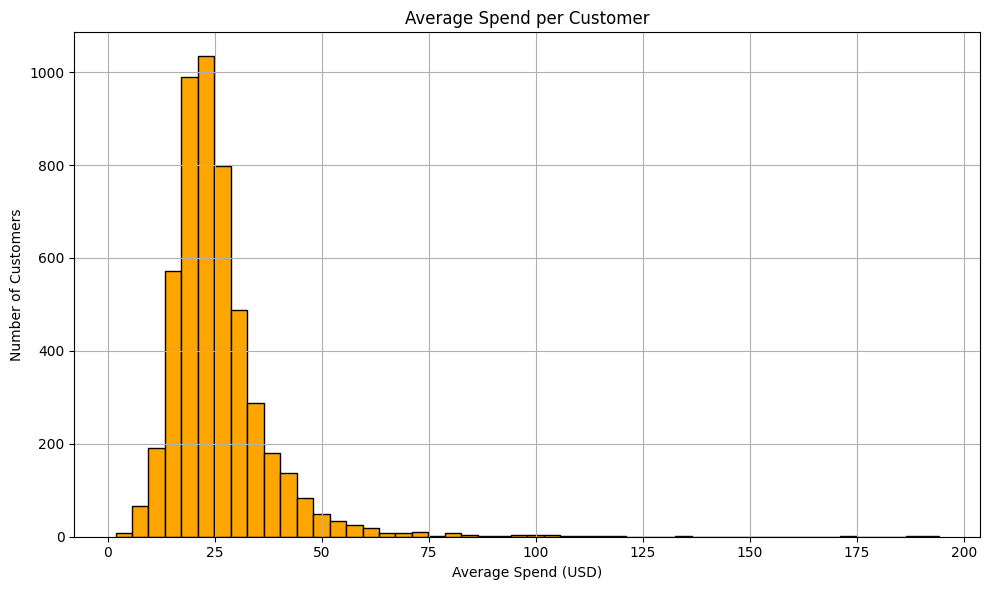

In [44]:
# Average Spend per Customer

from pyspark.sql.functions import avg,col

# Group by customer and calculate average spend

df = df.withColumn("TotalSpend", col("Quantity") * col("Purchase Price Per Unit"))
avg_spend_per_customer = df.groupBy("ResponseID").agg(avg("TotalSpend").alias("AvgSpend"))
# Convert to Pandas for visualisation
avg_spend_pd = avg_spend_per_customer.toPandas()
# Plot
plt.figure(figsize=(10, 6))
plt.hist(avg_spend_pd["AvgSpend"], bins=50, color="orange", edgecolor="black")
plt.title("Average Spend per Customer")
plt.xlabel("Average Spend (USD)")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

Analyse the Repeat Purchase Behavior of Customers

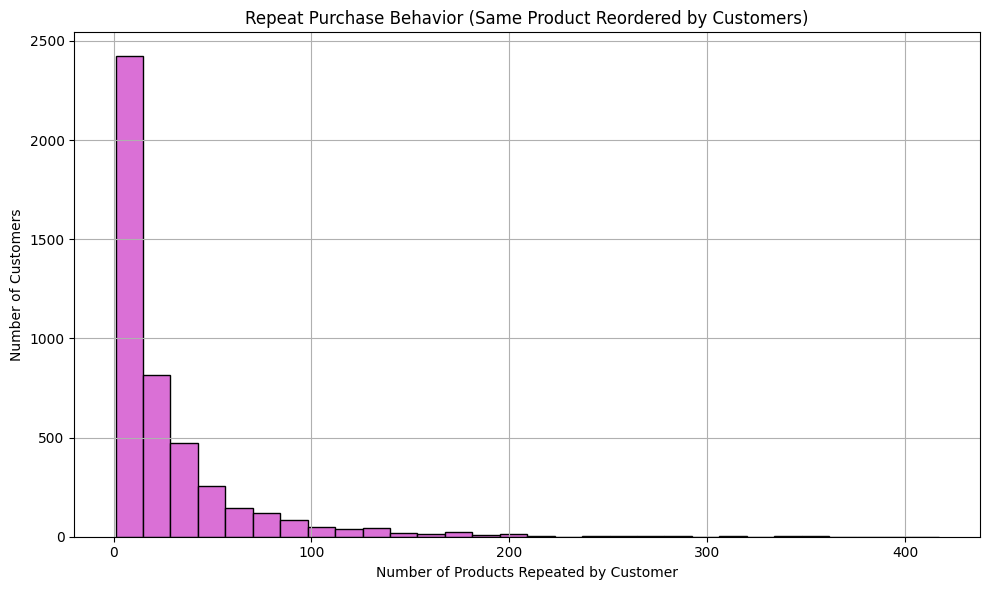

In [45]:
# Repeat Purchase Analysis Behavior Per Customers
from pyspark.sql.functions import count

# Group by customer and product, and count occurrences
repeat_df = df.groupBy("ResponseID", "ASIN/ISBN (Product Code)").agg(count("*").alias("purchase_count"))

# Filter to retain only actual repeat purchases where purchase_count is more than 1
repeat_df = repeat_df.filter(col("purchase_count") > 1)

# Count how many customers have repeat purchases
customer_repeat_count = repeat_df.groupBy("ResponseID").count().withColumnRenamed("count", "RepeatProductCount")


# Convert to Pandas for visualisation
customer_repeat_pd = customer_repeat_count.toPandas()

# Plot

plt.figure(figsize=(10, 6))
plt.hist(customer_repeat_pd["RepeatProductCount"], bins=30, color="orchid", edgecolor="black")
plt.title("Repeat Purchase Behavior (Same Product Reordered by Customers)")
plt.xlabel("Number of Products Repeated by Customer")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

Analyse the top 10 high-engagement customers

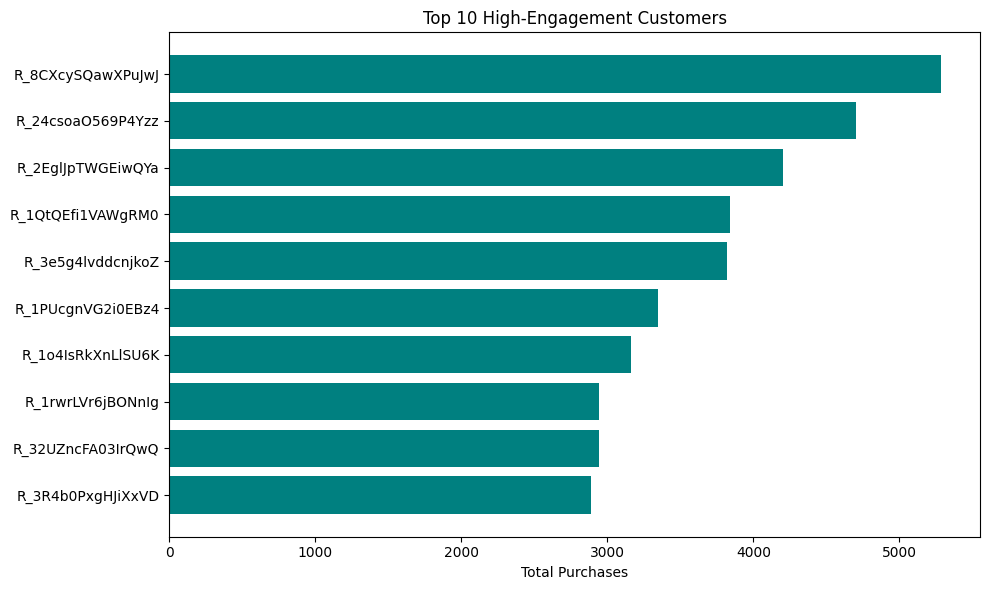

In [46]:
# Top 10 High-Engagement Customers

from pyspark.sql.functions import count

# Group by customer (ResponseID) and count number of purchases
customer_activity_df = df.groupBy("ResponseID").agg(count("*").alias("TotalPurchases"))

# Get top 10 customers with highest number of purchases
top_customers_df = customer_activity_df.orderBy(col("TotalPurchases").desc()).limit(10)

# Convert to Pandas for visualization
top_customers_pd = top_customers_df.toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_customers_pd["ResponseID"].astype(str), top_customers_pd["TotalPurchases"], color="teal")
plt.xlabel("Total Purchases")
plt.title("Top 10 High-Engagement Customers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 3.10 Seasonal trends in product purchases and their impact on revenues <font color = red>[5 marks]</font> <br>

Investigate the seasonal trends in product purchases and their impact on the overall revenue.

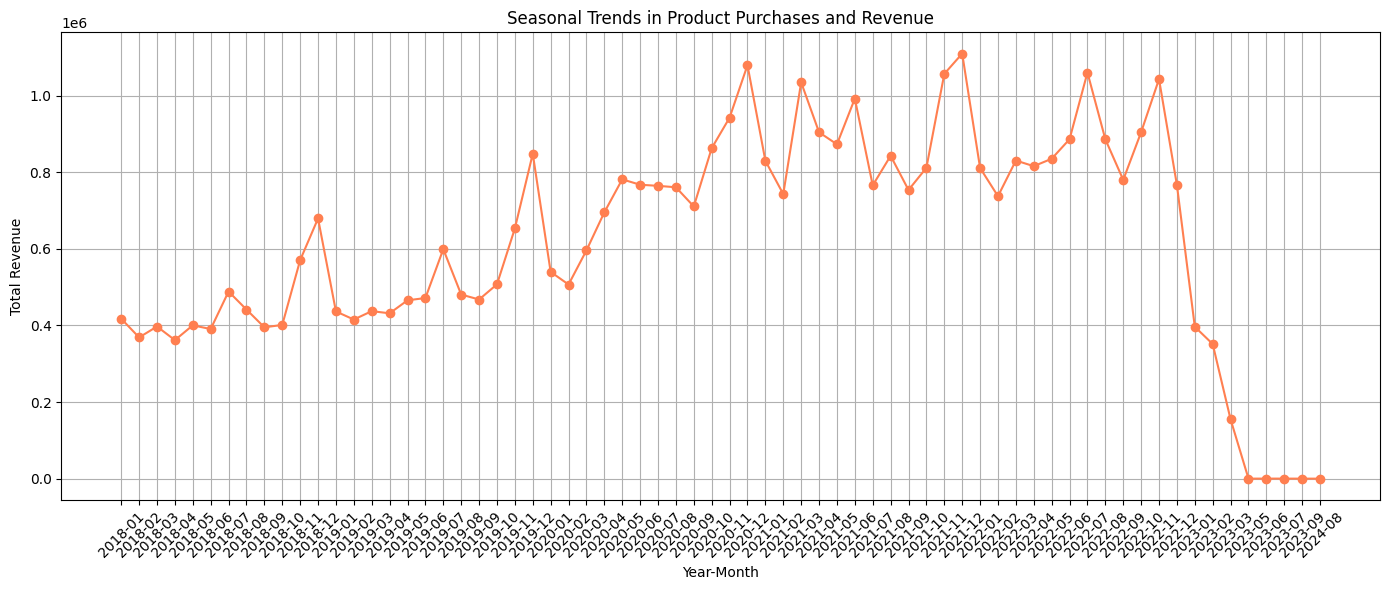

In [21]:
# Seasonal Trends in Product Purchases and Their Impact on Revenue

from pyspark.sql.functions import year
from pyspark.sql.functions import month, to_date, col

# Ensure 'Order Date' is in date format
df = df.withColumn("OrderDate", to_date("Order Date", "MM/dd/yyyy"))

# Extract Year and Month
df = df.withColumn("Year", year(col("OrderDate")))
df = df.withColumn("Month", month(col("OrderDate")))

# Calculate Revenue per row
df = df.withColumn("Revenue", col("Quantity") * col("Purchase Price Per Unit"))

# Group by Year and Month, and summing total revenue
seasonal_df = df.groupBy("Year", "Month").agg({"Revenue": "sum"}).withColumnRenamed("sum(Revenue)", "TotalRevenue")

# Order by Year and Month for proper sequence
seasonal_df = seasonal_df.orderBy("Year", "Month")

# Convert to Pandas
seasonal_pd = seasonal_df.toPandas()

# Create a 'Year-Month' label for x-axis
seasonal_pd["YearMonth"] = seasonal_pd["Year"].astype(str) + "-" + seasonal_pd["Month"].astype(str).str.zfill(2)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(seasonal_pd["YearMonth"], seasonal_pd["TotalRevenue"], marker='o', linestyle='-', color='coral')
plt.title("Seasonal Trends in Product Purchases and Revenue")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



## 3.11 Customer location vs purchasing behavior <font color = red>[5 marks]</font> <br>

Examine the relationship between customer's location and their purchasing behaviors

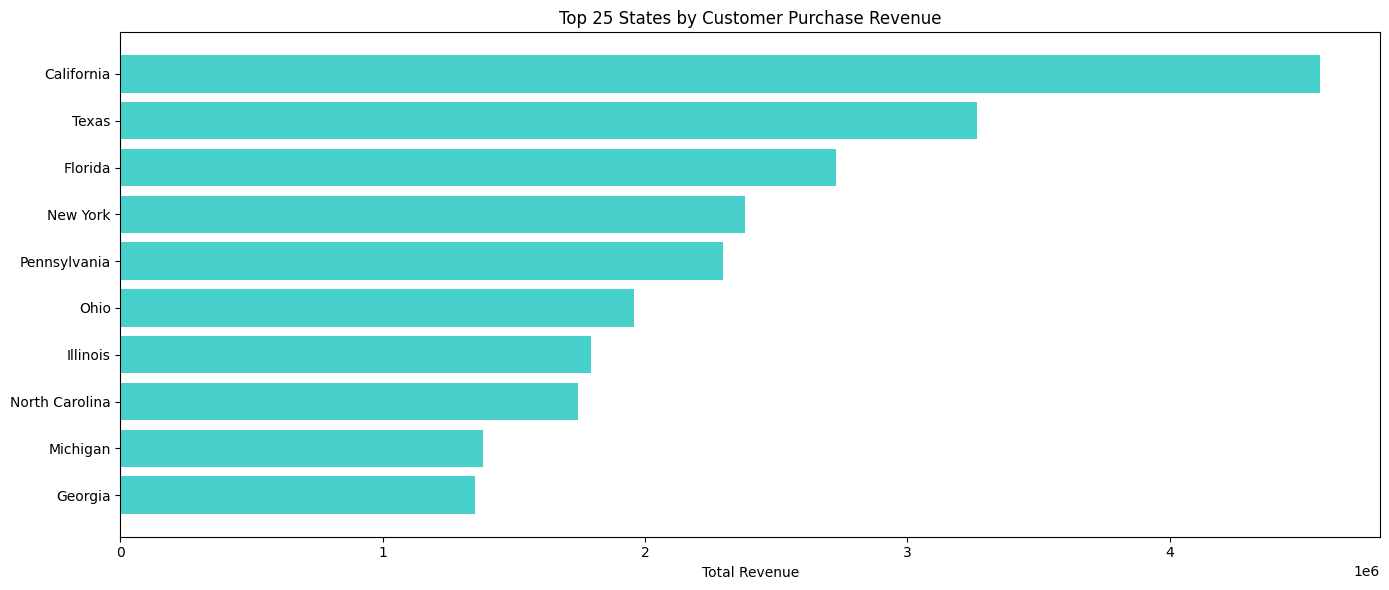

In [23]:
# Relationship Between Customer Location and Purchase Behavior

from pyspark.sql.functions import col

# Calculate revenue per purchase
df = df.withColumn("Revenue", col("Quantity") * col("Purchase Price Per Unit"))

# Group by state and sum revenue
state_revenue_df = df.groupBy("Q-demos-state").agg({"Revenue": "sum"}).withColumnRenamed("sum(Revenue)", "TotalRevenue")

# Order by descending revenue and get top 25 states
top_states_df = state_revenue_df.orderBy(col("TotalRevenue").desc()).limit(10)

# Convert to Pandas
top_states_pd = top_states_df.toPandas()

# Plot
plt.figure(figsize=(14, 6))
plt.barh(top_states_pd["Q-demos-state"], top_states_pd["TotalRevenue"], color="mediumturquoise")
plt.xlabel("Total Revenue")
plt.title("Top 25 States by Customer Purchase Revenue")
plt.gca().invert_yaxis()  # Highest revenue on top
plt.tight_layout()
plt.show()


#4. Customer Segmentation and Insights <font color = red>[45 marks]</font> <br>


## 4.1 Perform RFM Analysis <font color = red>[10 marks]</font> <br>

RFM Analysis is a powerful customer segmentation technique used to evaluate and quantify customer value based on three key dimensions:
- **Recency**,
- **Frequency**,
- **Monetary**.

This method is particularly effective in identifying high-value customers, optimizing marketing strategies, and improving customer retention in the e-commerce industry.


### 1. Recency (R)
Recency measures how recently a customer made a purchase Customers who have purchased more recently are more likely to respond to promotions and offers.
- **Application:** By ranking customers based on the number of days since their last transaction, you can prioritize those who are most engaged.

### 2. Frequency (F)
Frequency counts the number of purchases a customer has made over a given period.
Frequent purchasers tend to be more loyal and are often a source of recurring revenue.
- **Application:** Analyzing purchase frequency helps in identifying consistent buyers and understanding their buying patterns.

### 3. Monetary (M)
Monetary value represents the total amount of money a customer has spent.
Customers who spend more are often more profitable, making them ideal targets for retention and upsell strategies.
- **Application:** By assessing the monetary contribution, you can distinguish between high-value and low-value customers.


### Prepare data for RFM Analysis <font color = red>[2 marks]</font> <br>


In [ ]:
from pyspark.sql.functions import col, to_date, datediff, max, count, sum, lit, when

# Get the latest order date in the dataset
df = df.withColumn("OrderDate", to_date(col("`Order Date`"), "MM/dd/yyyy"))
latest_order_date = df.agg(max("OrderDate")).collect()[0][0]

# Calculate RFM metrics
rfm_df = df.groupBy("ResponseID").agg(
    when(max("OrderDate").isNotNull(), datediff(lit(latest_order_date), max("OrderDate")))
    .otherwise(lit(None))  # or some default value for Recency when OrderDate is null
    .alias("Recency"),
    count("*").alias("Frequency"),
    sum(col("Quantity") * col("Purchase Price Per Unit")).alias("Monetary")
)

# Filter out customers with no purchases
rfm_df = rfm_df.filter(col("Frequency") > 0)

# Show RFM data
rfm_df.show()

In [ ]:
from pyspark.sql.functions import log1p
from pyspark.sql.functions import (
    to_date, col, max as spark_max, datediff, count, sum as spark_sum, lit
)
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Rename 'Order Date' for convenience
df = df.withColumnRenamed("Order Date", "OrderDateRaw")

# Convert OrderDateRaw to DateType
df = df.withColumn("OrderDate", to_date(col("OrderDateRaw"), "MM/dd/yyyy"))

# Get the latest order date in dataset
latest_order_date = df.agg(spark_max("OrderDate")).collect()[0][0]

# Calculate RFM metrics
rfm_df = df.groupBy("ResponseID").agg(
    datediff(lit(latest_order_date), spark_max("OrderDate")).alias("Recency"),
    count("*").alias("Frequency"),
    spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("Monetary")
)

# Filter out customers with no purchases
rfm_df = rfm_df.filter(col("Frequency") > 0)

#  Log transformation (to normalize skewed distributions)
rfm_log_df = rfm_df.select(
    col("ResponseID"),
    log1p("Recency").alias("Recency_log"),
    log1p("Frequency").alias("Frequency_log"),
    log1p("Monetary").alias("Monetary_log")
)

# Convert to Pandas DataFrame
rfm_pandas_df = rfm_log_df.toPandas()

# Standard scaling
scaler = StandardScaler()
scaled_values = scaler.fit_transform(rfm_pandas_df[["Recency_log", "Frequency_log", "Monetary_log"]])

# Construct final DataFrame
rfm_scaled_df = pd.DataFrame(
    scaled_values,
    columns=["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]
)
rfm_scaled_df["ResponseID"] = rfm_pandas_df["ResponseID"].values

#  View result
print(rfm_scaled_df.head())

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']]

wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 4  # From the elbow curve plotted

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)  # X is your scaled RFM data (from previous code)

# Add cluster labels to the Pandas DataFrame
rfm_scaled_df['Cluster'] = kmeans.labels_

# Optionally, convert back to PySpark DataFrame (if needed)
rfm_spark_df = spark.createDataFrame(rfm_scaled_df)

# View the updated DataFrame
print(rfm_scaled_df.head())

In [ ]:
# Convert the full RFM dataset from PySpark DataFrame to Pandas DataFrame for visualisation
import seaborn as sns
rfm_pandas_df = rfm_df.toPandas()
# Generate a pairplot to visualise the relationships between the numeric RFM columns
sns.pairplot(rfm_pandas_df[['Recency', 'Frequency', 'Monetary']])
plt.suptitle('Pairplot of RFM Features', y=1.02)  # Add a title above the pairplot
plt.show()

### Behavioral Trends Analysis <font color = red>[8 marks]</font> <br>

Perform RFM analysis to study the behavior of customers to tailor marketing strategies

In [ ]:
from pyspark.sql.functions import (
    to_date, col, max as spark_max, datediff, count, sum as spark_sum, lit
)
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Rename 'Order Date' for convenience
df = df.withColumnRenamed("Order Date", "OrderDateRaw")

# Convert OrderDateRaw to DateType
df = df.withColumn("OrderDate", to_date(col("OrderDateRaw"), "MM/dd/yyyy"))

# Get the latest order date in dataset
latest_order_date = df.agg(spark_max("OrderDate")).collect()[0][0]

# Calculate RFM metrics
rfm_df = df.groupBy("ResponseID").agg(
    datediff(lit(latest_order_date), spark_max("OrderDate")).alias("Recency"),
    count("*").alias("Frequency"),
    spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("Monetary")
)

# Filter out customers with no purchases
rfm_df = rfm_df.filter(col("Frequency") > 0)

#  Log transformation (to normalize skewed distributions)
rfm_log_df = rfm_df.select(
    col("ResponseID"),
    log1p("Recency").alias("Recency_log"),
    log1p("Frequency").alias("Frequency_log"),
    log1p("Monetary").alias("Monetary_log")
)

# Convert to Pandas DataFrame
rfm_pandas_df = rfm_log_df.toPandas()

# Standard scaling
scaler = StandardScaler()
scaled_values = scaler.fit_transform(rfm_pandas_df[["Recency_log", "Frequency_log", "Monetary_log"]])

# Construct final DataFrame
rfm_scaled_df = pd.DataFrame(
    scaled_values,
    columns=["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]
)
rfm_scaled_df["ResponseID"] = rfm_pandas_df["ResponseID"].values

#  View result
print(rfm_scaled_df.head())

In [ ]:
from pyspark.sql import SparkSession
from sklearn.cluster import KMeans

# Assuming you have rfm_scaled_df (Pandas DataFrame) and spark (SparkSession)
# ... (previous code to create rfm_scaled_df) ...

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']])

# Add cluster labels to the Pandas DataFrame
rfm_scaled_df['Cluster'] = kmeans.labels_

# Convert back to PySpark DataFrame
rfm_spark_df = spark.createDataFrame(rfm_scaled_df)

# Show the first few rows of the PySpark DataFrame
rfm_spark_df.show(5)

Analyse the Cluster Distribution by Income <font color = red>[2 marks]</font> <br>


In [ ]:
from pyspark.sql.functions import count

# Join the RFM dataset with the survey dataset using a common key
cluster_income_df = rfm_spark_df.join(survey, rfm_spark_df["ResponseID"] == survey["ResponseID"], "inner") \
    .select(rfm_spark_df["Cluster"], survey["Q-demos-income"])

# Aggregate data to count the number of customers per Cluster-Income group
cluster_income_counts = cluster_income_df.groupBy("Cluster", "Q-demos-income") \
    .agg(count("*").alias("CustomerCount"))

# Convert the aggregated data from PySpark DataFrame to Pandas DataFrame for visualisation
cluster_income_pandas_df = cluster_income_counts.toPandas()

# Plot

plt.figure(figsize=(10, 6))
sns.barplot(x="Cluster", y="CustomerCount", hue="Q-demos-income", data=cluster_income_pandas_df)
plt.title("Cluster Distribution by Income")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

Analyse the Average Spending by Cluster <font color = red>[2 marks]</font> <br>


In [ ]:
from pyspark.sql.functions import avg

# Compute the average values of 'Recency_log', 'Frequency', and 'Monetary_log' for each customer cluster
cluster_spending_df = rfm_spark_df.groupBy("Cluster").agg(
    avg("Recency_scaled").alias("AvgRecency"),
    avg("Frequency_scaled").alias("AvgFrequency"),
    avg("Monetary_scaled").alias("AvgMonetary")
)

# Convert the aggregated cluster summary from PySpark DataFrame to Pandas DataFrame for visualisation
cluster_spending_pandas_df = cluster_spending_df.toPandas()

# Generate a bar plot to visualise the average monetary spending per cluster

plt.figure(figsize=(8, 6))
plt.bar(cluster_spending_pandas_df["Cluster"], cluster_spending_pandas_df["AvgMonetary"], color="skyblue")
plt.title("Average Spending by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Monetary Value (Scaled)")
plt.xticks(cluster_spending_pandas_df["Cluster"])  # Set x-axis ticks to cluster labels
plt.show()

Analyse the Purchase Frequency vs. Recency <font color = red>[2 marks]</font> <br>


In [ ]:
# Convert the RFM dataset from PySpark DataFrame to Pandas DataFrame for visualisation
rfm_pandas_df = rfm_scaled_df #rfm_df.toPandas()

# Generate a scatter plot to analyse the relationship between Purchase Frequency and Recency
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency_scaled', y='Frequency_scaled', data=rfm_pandas_df, hue='Cluster', palette='viridis')
plt.title('Purchase Frequency vs. Recency')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency (Number of Purchases)')
plt.show()

Analyse the top categories by clusters <font color = red>[2 marks]</font> <br>


In [ ]:
from pyspark.sql.functions import sum as spark_sum, collect_list, struct, explode, slice, col

# Join the merged dataset with the RFM dataset to associate each customer with their respective cluster
cluster_category_df = df.join(rfm_spark_df, on="ResponseID", how="inner")

# Group the filtered data by 'Category' and compute the total spending in each category
top_categories_by_cluster = cluster_category_df.groupBy("Cluster", "Category") \
    .agg(spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("TotalSpending")) \
    .orderBy(col("TotalSpending").desc())

# Order the categories by total spending in descending order and select the top 5 highest spending categories
top_5_categories_by_cluster = top_categories_by_cluster.groupBy("Cluster") \
    .agg(collect_list(struct("Category", "TotalSpending")).alias("TopCategories")) \
    .withColumn("Top5Categories", slice(col("TopCategories"), 1, 5))  # Get top 5

# Convert the top categories dataset from PySpark DataFrame to Pandas DataFrame for visualisation
top_5_categories_pandas_df = top_5_categories_by_cluster.select(
    "Cluster", explode("Top5Categories").alias("TopCategory")
).select("Cluster", "TopCategory.*").toPandas()  # Flatten struct

# Plot the cluster

plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="TotalSpending", hue="Category", data=top_5_categories_pandas_df)
plt.title("Top 5 Categories by Cluster (Total Spending)")
plt.xlabel("Cluster")
plt.ylabel("Total Spending")
plt.show()

In [ ]:
from pyspark.sql.functions import sum as spark_sum

# Join the merged dataset with the RFM dataset to associate each customer with their respective cluster
cluster_category_df = df.join(rfm_spark_df, on="ResponseID", how="inner")

# Group the filtered data by 'Category' and compute the total spending in each category
top_categories_by_cluster = cluster_category_df.groupBy("Cluster", "Category") \
    .agg(spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("TotalSpending")) \
    .orderBy(col("TotalSpending").desc())

# Order the categories by total spending in descending order and select the top 5 highest spending categories
top_5_categories_by_cluster = top_categories_by_cluster.groupBy("Cluster") \
    .agg(collect_list(struct("Category", "TotalSpending")).alias("TopCategories")) \
    .withColumn("Top5Categories", slice(col("TopCategories"), 1, 5))  # Get top 5

# Convert the top categories dataset from PySpark DataFrame to Pandas DataFrame for visualisation
top_5_categories_pandas_df = top_5_categories_by_cluster.select(
    "Cluster", explode("Top5Categories").alias("TopCategory")
).select("Cluster", "TopCategory.*").toPandas()  # Flatten struct

# Plot the cluster

plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="TotalSpending", hue="Category", data=top_5_categories_pandas_df)
plt.title("Top 5 Categories by Cluster (Total Spending)")
plt.xlabel("Cluster")
plt.ylabel("Total Spending")
plt.show()

## 4.2 Insights <font color = red>[35 marks]</font> <br>


### 4.2.1 When to schedule effective promotions. <font color = red>[3 marks]</font> <br>

Compare sales across weekdays to schedule effective promotions

In [ ]:
from pyspark.sql.functions import dayofweek, sum as spark_sum

df = df.withColumn("DayOfWeek", dayofweek(col("OrderDate")))

# Group by weekday and sum total sales
weekday_sales = df.groupBy("DayOfWeek").agg(
    spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("TotalSales")
).orderBy("DayOfWeek")

# Convert to Pandas for visualisation
weekday_sales_pd = weekday_sales.toPandas()

# Plot sales by weekday
plt.figure(figsize=(8, 6))
plt.bar(weekday_sales_pd["DayOfWeek"], weekday_sales_pd["TotalSales"], color="lightgreen")
plt.title("Sales Across Weekdays")
plt.xlabel("Day of Week (1 = Sunday, 7 = Saturday)")
plt.ylabel("Total Sales")
plt.xticks(weekday_sales_pd["DayOfWeek"])  # Set x-axis ticks to weekday numbers
plt.show()

### 4.2.2 Top-selling Products <font color = red>[2 marks]</font> <br>

Identify top-selling products by considering revenue and engagement metrics

In [ ]:
from pyspark.sql.functions import sum as spark_sum

# Group by product and sum revenue
product_revenue = df.groupBy("Title").agg(
    spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("TotalRevenue")
).orderBy(col("TotalRevenue").desc())

# Get top 10 products by revenue
top_10_products = product_revenue.limit(10)

# Convert to Pandas for visualisation
top_10_products_pd = top_10_products.toPandas()

# Drop rows with None in 'Title' column
top_10_products_pd = top_10_products_pd.dropna(subset=['Title'])

# Plot top products by revenue
plt.figure(figsize=(10, 6))
plt.barh(top_10_products_pd["Title"], top_10_products_pd["TotalRevenue"], color="coral")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Title")
plt.gca().invert_yaxis()  # Invert y-axis to display highest revenue at the top
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### 4.2.3 State-wise revenue Distribution <font color = red>[5 marks]</font> <br>

Assess state-wise revenue to focus on high-growth areas

In [ ]:
from pyspark.sql.functions import sum as spark_sum

# Group by state and sum revenue
state_revenue = df.groupBy("Q-demos-state").agg(
    spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("TotalRevenue")
).orderBy(col("TotalRevenue").desc())

# Convert to Pandas for visualisation
state_revenue_pd = state_revenue.toPandas()

# Plot revenue by state

plt.figure(figsize=(12, 6))
plt.bar(state_revenue_pd["Q-demos-state"], state_revenue_pd["TotalRevenue"], color="skyblue")
plt.title("State-wise Revenue Distribution")
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### 4.2.4 Repeat Purchase Behavior <font color = red>[5 marks]</font> <br>

Examine repeat purchase behavior to enhance retention initiatives.

In [ ]:
from pyspark.sql.functions import count, col

# Count total purchases per customer
customer_purchases = df.groupBy("ResponseID").agg(count("*").alias("TotalPurchases"))

# Filter for repeat customers (those with more than one purchase)
repeat_customers = customer_purchases.filter(col("TotalPurchases") > 1)

# Show sample data
repeat_customers.show(5)  # Displaying the first 5 repeat customers

### 4.2.5 Flagging Potential Fraud <font color = red>[5 marks]</font> <br>

Identify irregular transaction patterns to flag potential fraud.

In [ ]:
from pyspark.sql.functions import col, avg, stddev, when

# Calculate total spending per transaction
df = df.withColumn("TotalSpent", col("Quantity") * col("Purchase Price Per Unit"))

# Calculate the average and standard deviation of total spending
spending_stats = df.agg(avg("TotalSpent").alias("avg_spending"), stddev("TotalSpent").alias("std_spending")).collect()[0]
avg_spending = spending_stats["avg_spending"]
std_spending = spending_stats["std_spending"]

# Calculate the threshold for unusually high spending (mean + 3 * std dev)
threshold = avg_spending + (3 * std_spending)

# Filter transactions that exceed the threshold
suspicious_transactions = df.filter(col("TotalSpent") > threshold)

# Show suspicious transactions
suspicious_transactions.show(5)  # Displaying the first 5 suspicious transactions

### 4.2.6 Demand Variations across product categories <font color = red>[5 marks]</font> <br>

Perform inventory management by monitoring demand variations across product categories.

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum, month, year

# Group by category and month, summing total revenue
category_trends = df.groupBy("Category", month("OrderDate").alias("Month"), year("OrderDate").alias("Year")) \
    .agg(spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("TotalRevenue"))

# Compute total revenue per category
category_total_revenue = category_trends.groupBy("Category").agg(spark_sum("TotalRevenue").alias("TotalRevenue"))

# Get the top 25 categories by total revenue
top_25_categories = category_total_revenue.orderBy(col("TotalRevenue").desc()).limit(25).select("Category").rdd.flatMap(lambda x: x).collect()

# Filter category_trends to include only top 25 categories
filtered_category_trends = category_trends.filter(col("Category").isin(top_25_categories))

# Convert to Pandas for visualisation
category_trends_pd = filtered_category_trends.toPandas()

# Plot revenue trends for top 25 categories
plt.figure(figsize=(14, 8))
sns.lineplot(x="Month", y="TotalRevenue", hue="Category", data=category_trends_pd)
plt.title("Revenue Trends for Top 25 Categories")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

### 4.2.7 Assess how bulk purchases affect revenue and supply chain operations <font color = red>[5 marks]</font> <br>

Analyse the impact of how bulk purchasing behavior affects revenue and the overall supply chain operations.

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Filter bulk purchases (Quantity > 5)
bulk_purchases = df.filter(col("Quantity") > 5)

# Compute total revenue per category for bulk purchases
bulk_revenue_by_category = bulk_purchases.groupBy("Category").agg(
    spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("TotalRevenue")
).orderBy(col("TotalRevenue").desc())

# Select the top 25 categories by total revenue
top_25_bulk_categories = bulk_revenue_by_category.limit(25)

# Convert to Pandas for visualisation
top_25_bulk_categories_pd = top_25_bulk_categories.toPandas()

# *** Handle Missing Values in 'Category' column before plotting ***
top_25_bulk_categories_pd = top_25_bulk_categories_pd.dropna(subset=['Category'])
# Alternatively, replace None values with a string like 'Unknown':
# top_25_bulk_categories_pd['Category'] = top_25_bulk_categories_pd['Category'].fillna('Unknown')

# Plot revenue from bulk purchases (Top 25 categories)

plt.figure(figsize=(12, 6))
plt.barh(top_25_bulk_categories_pd["Category"], top_25_bulk_categories_pd["TotalRevenue"], color="steelblue")
plt.title("Revenue from Bulk Purchases (Top 25 Categories)")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.gca().invert_yaxis()  # Invert y-axis to display highest revenue at the top
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### 4.2.8 Compare lifecycle strategies <font color = red>[5 marks]</font> <br>

Compare new and established products to inform and compare lifecycle strategies to make informed decisions.

In [ ]:
from pyspark.sql.functions import min, sum as spark_sum, year, first

# Compute "Launch Year" as the first recorded sale year for each product
product_launch_year = df.groupBy("Title").agg(
    first(year(col("OrderDate")), ignorenulls=True).alias("LaunchYear")
).dropna()

# Join this back to the main dataset
df_with_launch_year = df.join(product_launch_year, on="Title", how="inner")

# Now, we can compute revenue by launch year
revenue_by_launch_year = df_with_launch_year.groupBy("LaunchYear").agg(
    spark_sum(col("Quantity") * col("Purchase Price Per Unit")).alias("TotalRevenue")
).orderBy("LaunchYear")

# Convert to Pandas
revenue_by_launch_year_pd = revenue_by_launch_year.toPandas()

# Plot revenue vs. launch year
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_launch_year_pd["LaunchYear"], revenue_by_launch_year_pd["TotalRevenue"], marker='o', linestyle='-')
plt.title("Revenue vs. Product Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

#5 Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

1. Customer Segments Show Distinct Spending Behaviors (Cluster Analysis)
Cluster 0 dominates overall spending, especially in categories like ABIS_BOOK, GIFT_CARD, and PET_FOOD — suggesting this is the most valuable segment.Cluster 1 shows moderate spending, primarily in ABIS_BOOK, HEADPHONES, and SHOES, indicating a tech-and lifestyle-oriented group.
Cluster 2 has minimal spending, likely representing low-engagement or infrequent buyers.

2. Weekday Spending Trends
Tuesday (Day 2) shows the highest total sales, suggesting it could be the best day for launching new deals or campaigns.Saturday (Day 7) shows the lowest sales, possibly due to offline shopping preferences or user disengagement during weekends.
Weekday sales are relatively consistent, but midweek (Tue–Thu) offers stronger performance.

3. Product Revenue Insights
Amazon-branded gift products (Gift Card Balance Reload, eGift Card, and Reload) are the top 3 revenue drivers, indicating strong demand for flexible digital purchases.
Apple and gaming products (AirPods, PlayStation 5, Nintendo Switch) also rank high, showing strong consumer interest in premium tech.The long tail of product revenue drops sharply after the top 3, emphasizing the importance of a few key SKUs.


4. State-wise Revenue Distribution: California stands out as the state generating the highest overall revenue, significantly more than any other state. There's a wide disparity in revenue across states, with a long tail of states contributing considerably less.

5. Revenue Trends for Top 25 Categories: Revenue trends for different product categories vary throughout the year. Some categories exhibit significant volatility, possibly due to seasonality or promotions, while others show more stable demand. There's a tendency for some categories to experience an uptick in revenue towards the end of the year, likely due to holiday shopping. A few categories visually appear to generate higher revenue overall, though identification requires a clearer legend.

6.  Revenue vs. Product Launch Year: Products launched in 2021 generated the highest total revenue. There was a growth in revenue from products launched between 2018 and 2021, followed by a decline in revenue from products launched in subsequent years, with a particularly sharp drop for products launched in 2023.